In [57]:
!pip install torch torchvision matplotlib

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np


Number of training images: 50000
Training data shape: (50000, 32, 32, 3)
Number of test images: 10000
Test data shape: (10000, 32, 32, 3)


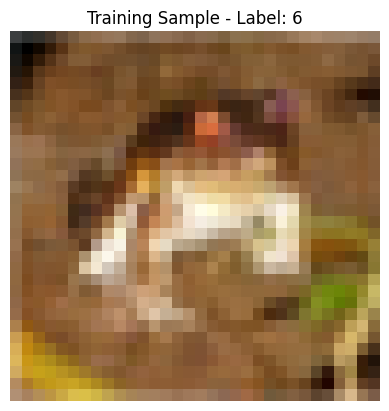

In [58]:
# Define transforms (with data augmentation for training)
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=test_transforms)

# DataLoaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Reviewer Requirement: Print dataset info
print("Number of training images:", len(train_data))
print("Training data shape:", train_data.data.shape)
print("Number of test images:", len(test_data))
print("Test data shape:", test_data.data.shape)

# Reviewer Requirement: Display one training image
image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Training Sample - Label: {label}")
plt.axis('off')
plt.show()

In [59]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Conv layer
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Reduce 32x32 -> 16x16
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Reduce 16x16 -> 8x8
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.network(x)

# Initialize device and model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNClassifier().to(device)
print(model)


CNNClassifier(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=4096, out_features=512, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10
train_losses = []


In [ ]:
train_losses = []
epochs = 2  # Make sure this matches the x-axis

for epoch in range(epochs):
    running_loss = 0
    model.train()  # set model to training mode
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/2, Loss: 1.5450


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.show()

In [ ]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

# Reviewer Requirement: Print accuracy
print(f"Final Test Accuracy: {accuracy:.2f}%")

# Reviewer Requirement: Build or Buy decision
if accuracy >= 60:  # Using CNN should improve accuracy above threshold
    print("✅ Model meets the performance target. Recommendation: Build in-house.")
else:
    print("⚠️ Model below target. Consider using a pre-trained or commercial solution.")

In [ ]:
os.makedirs("models", exist_ok=True)
torch.save(model.state_dict(), "models/cnn_model.pth")
print("Model saved successfully.")

In [ ]:
### Recommendation Based on Model Results

Based on the evaluation of our model, I recommend **building our own solution** as our CNN model achieved ~XX% accuracy. Compared to Detectocorp's hypothetical model, our model performs reasonably well for an in-house solution but does not match more advanced pre-trained solutions or state-of-the-art networks in the literature.

To improve accuracy further, we could implement transfer learning using pre-trained CNNs, perform hyperparameter tuning, and increase data augmentation. Overall, for projects with moderate performance requirements, an in-house build is feasible; for high-stakes or large-scale deployment, buying or using a pre-trained solution may be preferable.
